# Tree-Based Methods

$\textit{An Introduction to Statistical Learning: With Applications in R}$ (Gareth James, Daniela Witten, Trevor Hastie and Rob Tibshirani)

(1) 8.1 The Basics of Decision Trees

(2) 8.2 Random Forest

$\textit{CodeBasics Youtube Videos}$

(3) Decision Tree: https://www.youtube.com/watch?time_continue=1&v=PHxYNGo8NcI

(4) Random Forest: https://www.youtube.com/watch?v=ok2s1vV9XW0


## An Introduction to Statistical Learning: 8.1 The Basics of Decision Trees

### Regression Trees

Prediction via Stratification (Segmentation) of the Feature Space

(1) Divide the predictor space - the set of all possible values for $X_1, X_2, \dots, X_p$ - into $J$ distinct and non-overlapping regions, $R_1, R_2, \dots, R_J$.

(2) For every observation that falls into the region $R_j$, we make the same prediction, which is simply the mean of the response values for the training observations in $R_j$

EX. Obtain two regions $R_1$ and $R_2$, and the response mean of the training observations in the first region is 10 while the response mean of the training observations in the second region is 20. For a given observation $X = x$, if $x \in R_1$ we predict a value of 10, and if $x \in R_2$ we predict a value of 20.

Question: How do we construct the regions $R_1, \dots, R_J$?

* in theory, predictors could have any shape but we choose to divide predictor space into high-dimensional rectagles, or boxes, for simplicity and for ease of interpretation of the resulting predictive model

* goal is to find boxes $R_1, \dots, R_J$ that minimize the RSS given by $$\sum_{j=1}^J \sum_{i \in R_j} (y_i - \hat{y}_{R_j})^2 $$ where $\hat{y}_{R_j}$ := mean response for training obs within jth box

* unfortunately computationally infeasible to consider every possible partition of the feature space into J boxes; therefore we take top-down, greedy approach known as recursive binary splitting

* approach is top-down because it begins at the top of the tree (which is where all observations belong to a single region) and then successively splits the predictor space

* approach is greedy because at each stop of the tree-building process the best split is made at that particular step rather than looking ahead and picking a split that will lead to a better tree in some future step

* to perform recursive binary splitting, first select predictor $X_j$ and cutpoint $s$ such that splitting the predictor space into the regions $\{X~|~X_j < s\}$ and $\{X~|~X_j \geq s\}$ leads to greatest possible reduction in RSS

* consider all predictors $X_1, \dots, X_p$ and all possible values of the cutpoint $s$ for each of the predicotrs, and then choose the predictor and cutpoint such that the resulting tree has the lowest RSS

* more detail: for any $j$ and $s$, we define the pair of half planes $R_1(j,s) = \{X~|~X_j < s\}$ and $R_2(j,s) = \{X~|~X_j \geq s\}$ and we seek the value of $j$ and $s$ that minimizes the equation $$ \sum_{i: x_i \in R_1(j,s)} (y_i - \hat{y}_{R_1})^2 + \sum_{i: x_i \in R_2(j,s)} (y_i - \hat{y}_{R_2})^2$$ where $\hat{y}_{R_1}$ := mean response for training observations in $R_1(j,s)$ and $\hat{y}_{R_2}$ := mean response for training observations in $R_2(j,s)$

* find values of $j$ and $s$ that minimize the above equation can be done especially if number of features p isn't large

* repeat process and look for best predictor and best cutpoint to split data further as to minimize the RSS within each resulting region

* instead of splitting entire predictor space, split one of two previously identified regions; get three regions

* again keep trying to split regions to minimize RSS

* process keeps happening until stopping criterion is meet

* once regions are created then we predict response for a given test observation using mean of the training observations in the region to which that test observation belongs

Tree Pruning

* above process could overfit the data and lead to poor test set performance since the tree could be too complex

* smaller tree with fewer splits might lead to lower variance and better interpretation at cost of little bias

* one option: build tree only so long as decrease in RSS due to each split exceeds some (high) threshold

* problem: smaller trees but too short-sighted since a seemingly worthless split early on could be followed by a very good split that leads to larger reduction in RSS later on

* better strategy: grow a very large tree $T_0$ and then prune it back to obtain a subtree

* goal: select a subtree that leads to lowest test error rate

* given a subtree, can estimate its test error using cross-validation or validation set approach

* problem: estimating cross-validation error for every possible subtree is too cumbersome cause there's an extremely large number of possible subtrees

* need a way to select small set of subtrees for consideration

* cost complexity pruning, i.e weakest link pruning: consider a sequence of trees indexed by nonnegative tuning parameter $\alpha$ 

Algorithm: Building a Regression Tree

(1) use recursive binary splitting to grow a large tree on the training data, stopping only when each terminal node has fewer than some minimum number of observations

(2) apply cost complexity pruning to the large tree in order to obtain a sequence of best subtrees as a function of $\alpha$

(3) use K-fold cross-validation to choose $\alpha$. Divide the training observations into K folds. For each $k = 1, \dots, K$

(a) repeat steps 1 and 2 on all but kth fold on training data

(b) evaluate mean squared predictoin error on the data in the left-out kth fold as a function of $\alpha$

average the results for each value of $\alpha$ and pick $\alpha$ to minimize average error

(4) return subtree from step 2 that corresponds to the chosen value of $\alpha$

For each value of $\alpha$ there corresponds a subtree $T \subseteq T_0$ such that $$ \sum_{m=1}^{|T|} \sum_{i: x_i \in R_m} (y_i - \hat{y}_{R_m})^2 + \alpha |T|$$ is as small as possible

* |T| := # of terminal nodes of tree T

* $R_m$ := rectange i.e subset of predictor space corresponding to mth terminal nodes

* $\hat{y}_{R_m}$ := predicted response associated with $R_m$; mean of training obs in $R_m$

* $\alpha$ := controls trade-off between subtree's complexity and its fit to the training data

* as we increase $\alpha$ from zero branches get pruned from tree in a nested and predictable fashion; obtaining a sequence of subtrees as a function of $\alpha$ is easy

### Classification Trees

* used to predict a qualitative response rather than a quantitative one

* predict each observation belongs to the most commonly occurring class of training observations in the region to which it belongs

* when interpreting results of classification tree, often interested not only in class prediction corresponding to the particular terminal node region but also in class proportions among the training observations that fall into that region

* in classification setting, RSS cannot be used as criterion for making binary splits

* alternative: classification error rate; we plan on assigning an observation in a given region to the most commonly occurring class of training observations in that region

* classification error rate simply the fraction of training observations in that region that don't belong to the most common classes: $$E = 1 - \underset{k}{max}(\hat{p}_{mk})$$ where $\hat{p}_{mk}$ represents proportion of training observations in mth region that are from kth class

* classification error not sufficiently sensitive for tree-growing

* $\textit{Gini index}$: $$G = \sum_{k=1}^K \hat{p}_{mk} (1-\hat{p}_{mk})$$ a measure of total variance across K classes; preferred measure of node purity, a small value indicates that node contains predominantly observations from a single class

* alternative, $\textit{entropy}$: $$D = -\sum_{k=1}^K \hat{p}_{mk}~log \hat{p}_{mk}$$

* when building classification tree, Gini or Entropy used to evaluate quality of a particular split since two approaches are more sensitive to node purity than classification error rate

* any of three approaches might be used when pruning tree but classification error rate is preferable if prediction accuracy of final pruned tree is the goal

* splits may happen where both have same predicted value, but split is performed because it leads to node purity; one side may be "yes" but with more certainty than the other

### Trees Versus Linear Models

* linear regression assumes following model: $$ f(X) = \beta_0 + \sum_{j=1}^p X_j \beta_j$$

* regression trees assume following model: $$ f(X) = \sum_{m=1}^{M} c_m * 1_{X \in R_m} $$ where $R_1, \dots, R_M$ represents partition of feature space

* if relationship between features and response is well approximated by linear model then linear regression approach will outperform method such as regression tree that doesn't exploit linear structure

* if there's a highly non-linear and complex relationship between features and response then decision trees may outperform classical approaches

* relative performances of tree-based and classical approaches can be assesssed by estimating test error using either cross-validation or validation set approach

## An Introduction to Statistical Learning: 8.2.2 Random Forest



* each time a split in tree is considered, a random sample of m predictors is chosen as split candidates from the full set of p predictors

* split allowed to use only one of those m predictors

* fresh sample of m predictors is taken at each split; number of predictors considered at each split is approximately equal to the square root of the total number of predictors

* at each split in the tree, the algorithm isn't allowed to consider majority of the available predictors

* forces each split to consider only a subset of predictors; on average $\frac{(p-m)}{p}$ of splits will not even consider the strong predicot and so other predictors will have more of a chance

* think of as decorrelating the tree thereby making average of the resulting trees less variable and hence more reliable

## CodeBasics Youtube: Decision Tree

In [1]:
import pandas as pd
df = pd.read_csv('/Users/beliciarodriguez/GitHub/ECON485-Material-Review/data/salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [6]:
inputs = df.drop('salary_more_then_100k', axis='columns')
target = df['salary_more_then_100k']

In [12]:
from sklearn.preprocessing import LabelEncoder

# create three different objects for three different classes
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])

inputs.head()

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0


In [13]:
inputs_n = inputs.drop(['company', 'job', 'degree'], axis='columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [14]:
from sklearn import tree

model = tree.DecisionTreeClassifier()

model.fit(inputs_n, target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
model.score(inputs_n, target)

1.0

In [16]:
# predict person who works at google, sales executive, masters
model.predict([[2,2,1]])

array([0])

In [17]:
# predict business manager working at google with a masters
model.predict([[2,0,1]])

array([1])

## CodeBasics Youtube: Random Forest

In [18]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [19]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

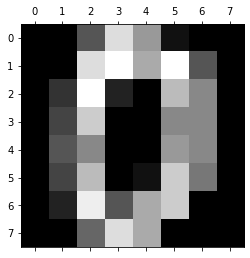

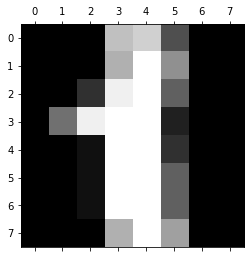

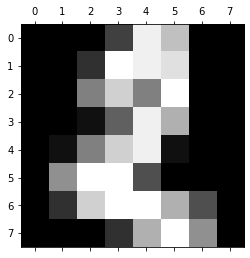

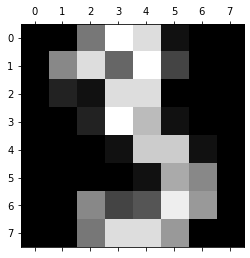

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [22]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [23]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [26]:
df['target'] = digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,13.0,15.0,10.0,15.0,5.0,0.0,0.0,3.0,15.0,2.0,0.0,11.0,8.0,0.0,0.0,4.0,12.0,0.0,0.0,8.0,8.0,0.0,0.0,5.0,8.0,0.0,0.0,9.0,8.0,0.0,0.0,4.0,11.0,0.0,1.0,12.0,7.0,0.0,0.0,2.0,14.0,5.0,10.0,12.0,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0,0.0,3.0,15.0,16.0,6.0,0.0,0.0,0.0,7.0,15.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,3.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,1.0,16.0,16.0,6.0,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,3.0,16.0,15.0,14.0,0.0,0.0,0.0,0.0,8.0,13.0,8.0,16.0,0.0,0.0,0.0,0.0,1.0,6.0,15.0,11.0,0.0,0.0,0.0,1.0,8.0,13.0,15.0,1.0,0.0,0.0,0.0,9.0,16.0,16.0,5.0,0.0,0.0,0.0,0.0,3.0,13.0,16.0,16.0,11.0,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,13.0,6.0,15.0,4.0,0.0,0.0,0.0,2.0,1.0,13.0,13.0,0.0,0.0,0.0,0.0,0.0,2.0,15.0,11.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,12.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,8.0,0.0,0.0,0.0,8.0,4.0,5.0,14.0,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,6.0,2.0,2.0,0.0,0.0,0.0,7.0,15.0,0.0,9.0,8.0,0.0,0.0,5.0,16.0,10.0,0.0,16.0,6.0,0.0,0.0,4.0,15.0,16.0,13.0,16.0,1.0,0.0,0.0,0.0,0.0,3.0,15.0,10.0,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis='columns'), digits.target, test_size=0.2)

len(X_test)

360

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
model.score(X_test, y_test)

0.9694444444444444

In [33]:
y_predicted = model.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[36,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  0,  2],
       [ 0,  0, 26,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  1,  0,  1,  1,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 35,  0,  0,  1,  0],
       [ 0,  1,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 30]])

Text(69.0, 0.5, 'Truth')

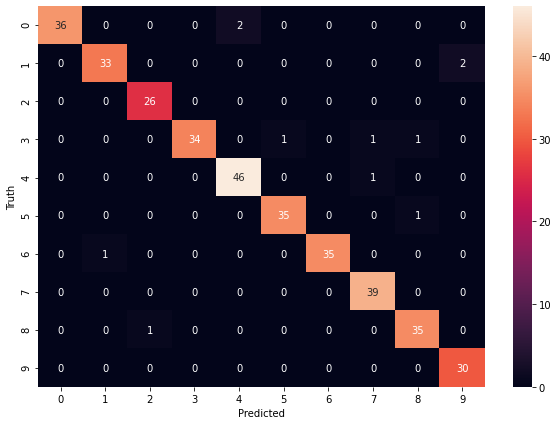

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')